In [1]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
LAMBDA = 10

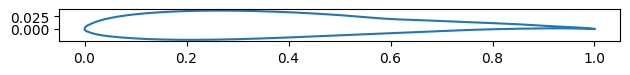

(0.004691888112574816, 0.05704386787267211, 24.1, 38.73725726224863, 0)

In [2]:

points = 'samples/Airfoils2D_049.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, -3, 0.6)
show_airfoil(af)
cd, _ = evalpreset(af)
perf, _, _ = evalperf(setflap(af, 3, 0.6))
cd, cal_thickness(af), cal_thickness_percent(af), perf, check_backpoint(af)

In [ ]:

f = open('results/Airfoils1D_simperf.log', 'r')
a = f.read()
f.close()
files = []
for name in a.split('path: ')[1:]:
    file = name.split('.dat')[0] + '.dat'
    files.append(file)

In [ ]:
for file in files:
    # points = 'samples/Airfoils1D_039.dat'
    # airfoil = np.loadtxt(points, skiprows=1)
    airfoil = np.loadtxt(file, skiprows=1)
    af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, lamda = LAMBDA, check_thickness=False)
    name = file.split('/')[1].split('.')[0]+f'_{a}_{b}F'
    np.savetxt(file.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=file.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")
    print(R, a, b, perf, cd, CD_BL)

In [4]:
points = 'samples/Airfoils2D_055.dat'
airfoil = np.loadtxt(points, skiprows=1)
print(cal_thickness(airfoil))
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, lamda = LAMBDA, check_thickness=False)
name = points.split('/')[1].split('.')[0]+f'_{a}_{b}F'
np.savetxt(points.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")
print(R, a, b, perf, cd, CD_BL)

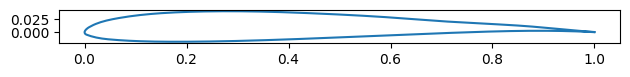

(False, 0.059090428071064925)

In [ ]:
# af = setupflap(airfoil, -2, 0.7)
show_airfoil(af)
detect_intersect(af), cal_thickness(af)

0

In [4]:
b = np.linspace(0.5, 0.6, num=5) 
a = np.linspace(-3,-1, num=5)
cdbl = 1
for pose in b:
    for alfa in a:
        afp = setupflap(airfoil, theta = alfa, pose = pose)
        cd, aa = evalpreset(afp)
        if cd < cdbl:
            pose_bl = pose
            alfa_bl = alfa
            af_bl = afp
            cdbl = cd
            print(pose_bl, alfa_bl, cdbl)

pose_bl, alfa_bl, cdbl

0.5 -3.0 0.004727809689939022
0.525 -3.0 0.004715275950729847
0.55 -3.0 0.004703772719949484
0.575 -3.0 0.004694736562669277
0.6 -3.0 0.004691888112574816


(0.6, -3.0, 0.004691888112574816)

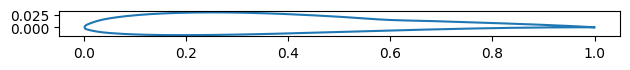

(0.0045923213474452496, 0.04434202263119762, 23.2, False, 0)

In [100]:
points = 'samples/tipAirfoils1D_004.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, -3, 0.6)
show_airfoil(af)
cd, _ = evalpreset(af, Re=1.4e5)
cd, cal_thickness(af), cal_thickness_percent(af), detect_intersect(af), check_backpoint(af)

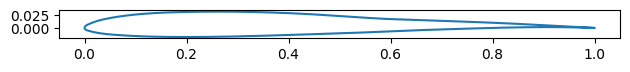

(0.007765299640595913, 0.0494810996854146, 23.5, False, 0)

In [5]:
points = 'samples/tipAirfoils1D_018.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, -3, 0.6)
show_airfoil(af)
cd, _ = evalpreset(af, Re=1.4e5)
cd, cal_thickness(af), cal_thickness_percent(af), detect_intersect(af), check_backpoint(af)

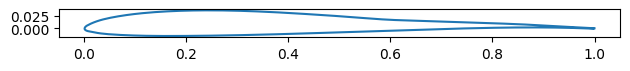

(0.007774534169584513, 0.049840547032591234, 22.3, False, 0)

In [75]:
points = 'samples/tipAirfoils2D_033.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, -3, 0.6)
show_airfoil(af)
cd, _ = evalpreset(af, Re=1.4e5)
cd, cal_thickness(af), cal_thickness_percent(af), detect_intersect(af), check_backpoint(af)

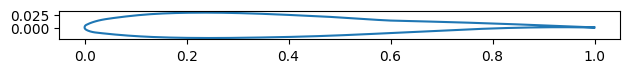

(0.007746719755232334, 0.04974515650061197, 23.7, False, 0)

In [99]:
points = 'samples/tipAirfoils2D_044.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, -3, 0.6)
show_airfoil(af)
cd, _ = evalpreset(af, Re=1.4e5)
cd, cal_thickness(af), cal_thickness_percent(af), detect_intersect(af), check_backpoint(af)

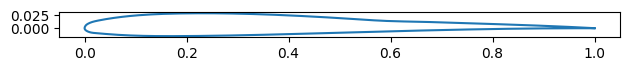

21.2

In [71]:
points = 'samples/tipAirfoils1D_004.dat'
airfoil = np.loadtxt(points, skiprows=1)
airfoil = setupflap(airfoil, -3, 0.6)
def set_thickness_pose(airfoil, pose):
    lh_idx = np.argmin(airfoil[:,0])
    lh_x = airfoil[lh_idx, 0]
    # Get trailing head
    th_x = np.minimum(airfoil[0,0], airfoil[-1,0])
    # Interpolate
    f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1])
    f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1])
    xx = np.linspace(lh_x, th_x, num=1000)
    yy_up = f_up(xx)
    yy_low = f_low(xx)
    max_thickness_index = (yy_up-yy_low).argmax()
    p = pose*10/max_thickness_index
    xxx = np.copy(xx)
    xxx[:max_thickness_index] = xx[:max_thickness_index] * p
    xxx[max_thickness_index:] = (xx[max_thickness_index:] - xx[max_thickness_index]) * (1000 - max_thickness_index * p) / (1000 - max_thickness_index) + xx[max_thickness_index] * p
    f_up = interp1d(xxx, yy_up)
    f_low = interp1d(xxx, yy_low)
    xx = np.linspace(xxx[0], xxx[-1], num=128)
    yy_up = f_up(xx)
    yy_low = f_low(xx)
    airfoil[:128,0] = np.flip(xx)
    airfoil[:128,1] = np.flip(yy_up)
    airfoil[128:,0] = xx
    airfoil[128:,1] = yy_low
    airfoil = np.delete(airfoil, [128], axis=0)
    xhat, yhat = savgol_filter((airfoil[:,0], airfoil[:,1]), 7, 3)
    airfoil[:,0] = xhat
    airfoil[:,1] = yhat
    airfoil = interpolate(airfoil, 256, 3)
    airfoil = derotate(airfoil)
    airfoil = Normalize(airfoil)
    airfoil = interpolate(airfoil, 256, 3)
    return airfoil
airfoil = set_thickness_pose(airfoil, cal_thickness_percent(airfoil)*(1-(25-23)/25))
show_airfoil(airfoil)
cal_thickness_percent(airfoil)


In [69]:
24 * 0.95

22.799999999999997